# Modal analysis of 3D velocity field

This script depends on the data produced by `naca0012_volume_modal_analysis.py`.

In [3]:
from os import makedirs
import numpy as np
import torch as pt
from scipy.signal import welch
import matplotlib.pyplot as plt
from utils import normalize_frequency

plt.rcParams['figure.dpi'] = 160
plt.rc('text', usetex=True)

outpath = "./output/naca0012_analysis/volume/"
makedirs(outpath, exist_ok=True)

In [4]:
svd_s = pt.load(f"{outpath}svd_z50_sig.pt")
svd_V = pt.load(f"{outpath}svd_z50_V.pt")
times = pt.load(f"{outpath}times.pt")

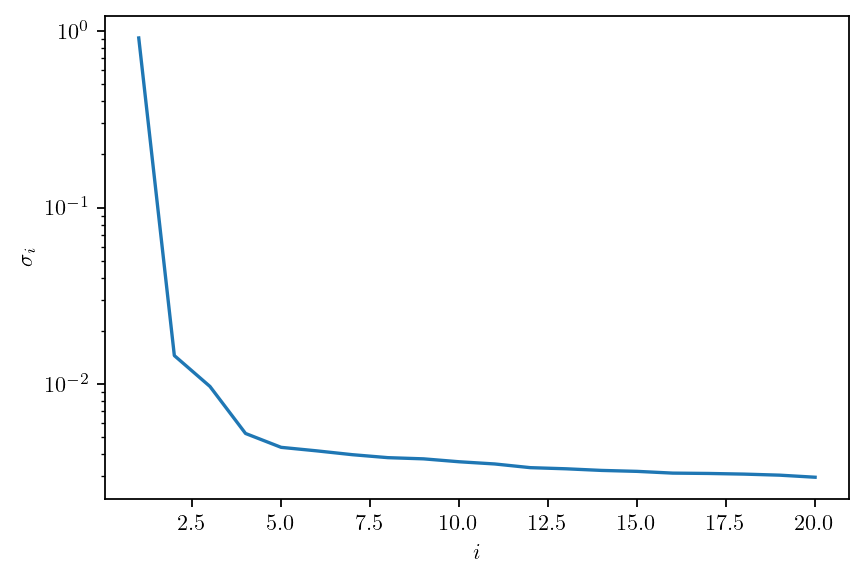

In [5]:
plt.plot(range(1, len(svd_s) + 1), svd_s/svd_s.sum())
plt.xlabel(r"$i$")
plt.ylabel(r"$\sigma_i$")
plt.yscale("log")
plt.show()

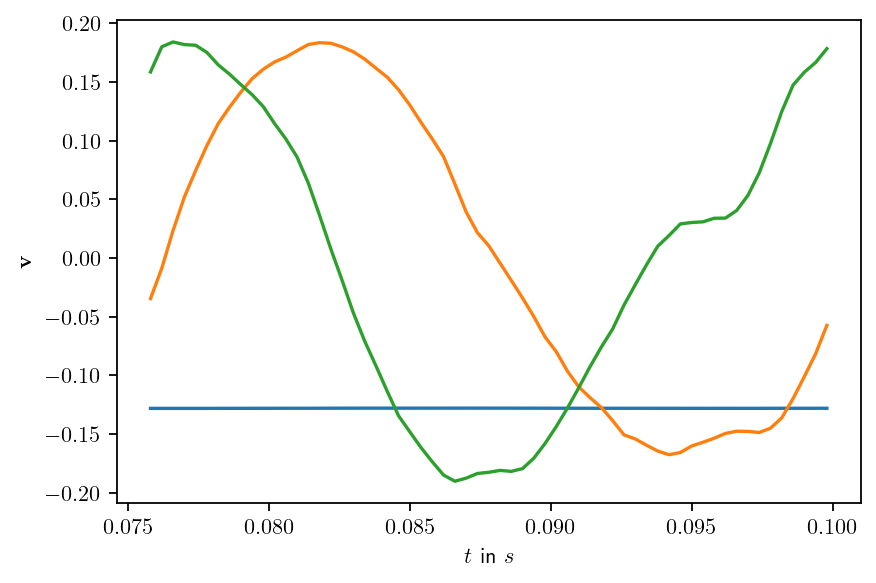

In [7]:
for i in range(3):
    plt.plot(times, svd_V[:, i])
plt.xlabel(r"$t$ in $s$")
plt.ylabel(r"$\mathbf{v}$")
plt.show()

In [8]:
dmd_f = pt.load(f"{outpath}dmd_z50_freq.pt")
dmd_imp = pt.load(f"{outpath}dmd_z50_int.pt")
dmd_eig = pt.load(f"{outpath}dmd_z50_eigvals.pt")

In [9]:
normalize_frequency(dmd_f)

tensor([ 10.0480, -10.0480,   4.4698,  -4.4698,   1.4166,  -1.4166,   0.0000,
          0.0000,   0.0000,   0.6116,  -0.6116])

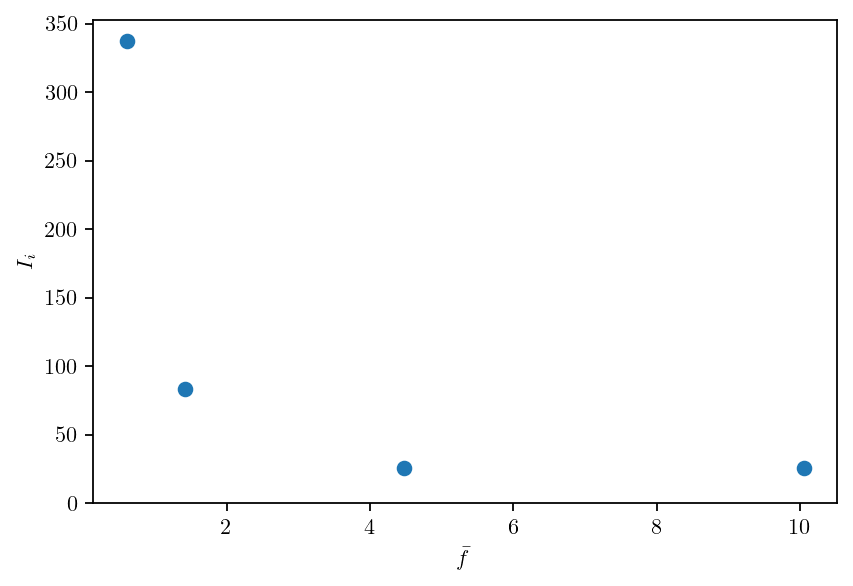

In [12]:
plt.scatter(normalize_frequency(dmd_f[dmd_f > 0]), dmd_imp[dmd_f > 0])
plt.xlabel(r"$\bar{f}$")
plt.ylabel(r"$I_i$")
plt.ylim(0)
plt.show()